<a href="https://www.kaggle.com/code/hassanmohammedzubair/bankchurners-recall-rate-98?scriptVersionId=136758280" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-churners-prediction/Bank Churners predictions.ipynb
/kaggle/input/credit-card-customers/BankChurners.csv


In [2]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",30)


pd.set_option("display.max_columns", 100)
pd.set_option('display.width', 1000)

path = '/kaggle/input/credit-card-customers/BankChurners.csv'
df = pd.read_csv(path)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
path = '/kaggle/input/credit-card-customers/BankChurners.csv'
df = pd.read_csv(path)
df.head(100)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,719712633,Existing Customer,64,M,1,Graduate,Married,Less than $40K,Blue,52,6,4,3,1709.0,895,814.0,1.656,1673,32,0.882,0.524,0.000343,0.999660
96,772629333,Existing Customer,45,M,3,Graduate,Married,$40K - $60K,Blue,35,5,4,2,3454.0,1200,2254.0,0.597,1313,30,0.304,0.347,0.000226,0.999770
97,720336708,Existing Customer,53,M,3,Doctorate,Married,$40K - $60K,Blue,35,5,3,2,3789.0,1706,2083.0,1.047,1609,42,0.680,0.450,0.000270,0.999730
98,802013583,Existing Customer,56,M,3,College,Married,$120K +,Blue,50,3,2,0,9689.0,2250,7439.0,0.576,1158,19,0.727,0.232,0.000042,0.999960


#Explorative Data Analysis

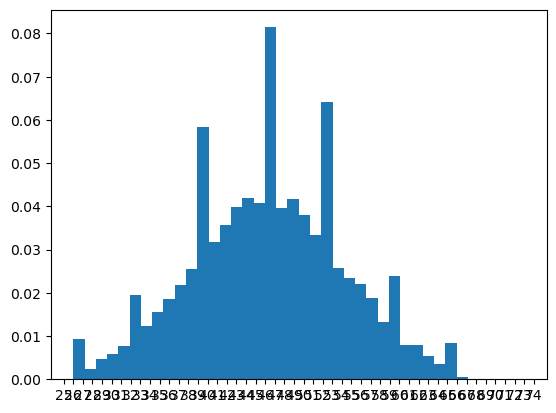

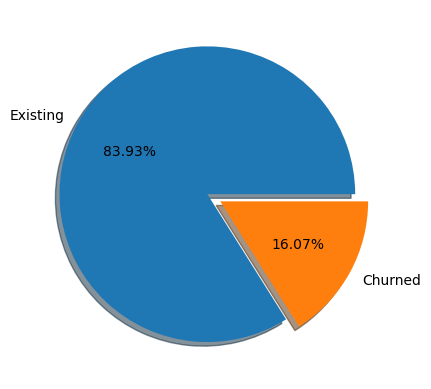

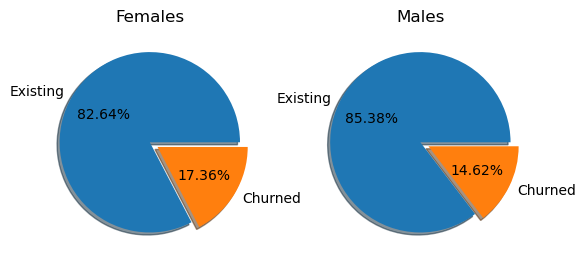

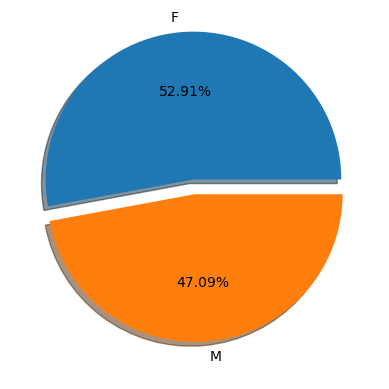

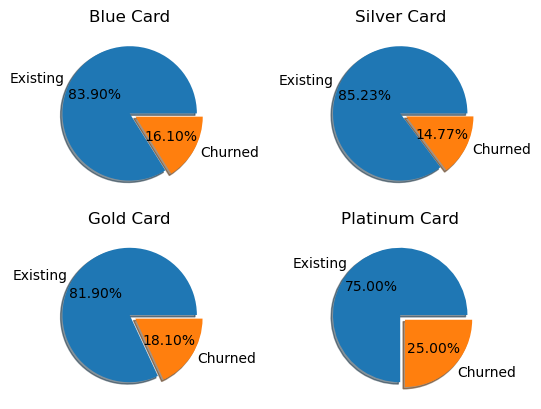

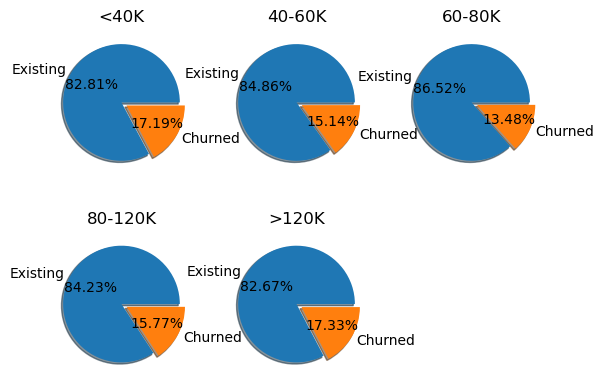

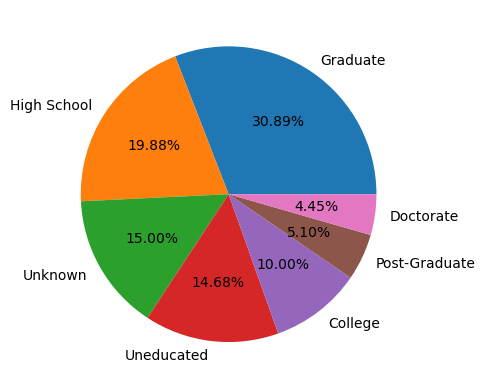

In [4]:
# EDA
plt.hist(df['Customer_Age'],bins=40,density=True)   
plt.xticks(range(25,75,1))
plt.show()

sizes = (df['Attrition_Flag'].value_counts()).tolist()
plt.pie(sizes,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
plt.show()

#gender based division
sizes_f = df.loc[df['Gender']=='F']['Attrition_Flag'].value_counts()
sizes_m = df.loc[df['Gender']=='M']['Attrition_Flag'].value_counts()
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.pie(sizes_f,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
ax1.title.set_text('Females')
ax2.pie(sizes_m,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
ax2.title.set_text('Males')
plt.show()

sizes_gender = df['Gender'].value_counts()    
plt.pie(sizes_gender.tolist(),autopct='%1.2f%%',labels=sizes_gender.index.values,explode=[0.1,0],shadow=True)
plt.show()

#card category based
sizes_b = df.loc[df['Card_Category']=='Blue']['Attrition_Flag'].value_counts().tolist()
sizes_s = df.loc[df['Card_Category']=='Silver']['Attrition_Flag'].value_counts().tolist()
sizes_g = df.loc[df['Card_Category']=='Gold']['Attrition_Flag'].value_counts().tolist()
sizes_p = df.loc[df['Card_Category']=='Platinum']['Attrition_Flag'].value_counts().tolist()
fig,((axs0, axs1), (axs2, axs3)) = plt.subplots(2,2)
axs0.pie(sizes_b,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs0.title.set_text('Blue Card')
axs1.pie(sizes_s,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs1.title.set_text('Silver Card')
axs2.pie(sizes_g,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs2.title.set_text('Gold Card')
axs3.pie(sizes_p,explode=[0,0.1],shadow=True,autopct='%1.2f%%',labels=['Existing','Churned'])
axs3.title.set_text('Platinum Card')
plt.show()


#income category based

sizes_0 = df.loc[df['Income_Category']=='Less than $40K']['Attrition_Flag'].value_counts().tolist()
sizes_40 = df.loc[df['Income_Category']=='$40K - $60K']['Attrition_Flag'].value_counts().tolist()
sizes_60 = df.loc[df['Income_Category']=='$60K - $80K']['Attrition_Flag'].value_counts().tolist()
sizes_80 = df.loc[df['Income_Category']=='$80K - $120K']['Attrition_Flag'].value_counts().tolist()
sizes_120 = df.loc[df['Income_Category']=='$120K +']['Attrition_Flag'].value_counts().tolist()
sizes_unkn = df.loc[df['Income_Category'] == 'Unknown']['Attrition_Flag'].value_counts().tolist()
labels_unkn = ['Existing', 'Churned']

fig, ((axs0, axs1, axs2), (axs3, axs4, axs5)) = plt.subplots(2, 3)
axs0.pie(sizes_0, explode=[0, 0.1], shadow=True, autopct='%1.2f%%', labels=['Existing', 'Churned'])
axs0.title.set_text('<40K')
axs1.pie(sizes_40, explode=[0, 0.1], shadow=True, autopct='%1.2f%%', labels=['Existing', 'Churned'])
axs1.title.set_text('40-60K')
axs2.pie(sizes_60, explode=[0, 0.1], shadow=True, autopct='%1.2f%%', labels=['Existing', 'Churned'])
axs2.title.set_text('60-80K')
axs3.pie(sizes_80, explode=[0, 0.1], shadow=True, autopct='%1.2f%%', labels=['Existing', 'Churned'])
axs3.title.set_text('80-120K')
axs4.pie(sizes_120, explode=[0, 0.1], shadow=True, autopct='%1.2f%%', labels=['Existing', 'Churned'])
axs4.title.set_text('>120K')

fig.delaxes(axs5)

plt.show()


#-education based
sizes_edu = df['Education_Level'].value_counts()
plt.pie(sizes_edu.tolist(),labels=sizes_edu.index.values,autopct='%1.2f%%')
plt.show()


# Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.003294


In [7]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

In [8]:
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)

In [9]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [11]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
for column in df.columns:
    print(f'{column}:{df[column].values}')

CLIENTNUM:[768805383 818770008 713982108 ... 716506083 717406983 714337233]
Attrition_Flag:['Existing Customer' 'Existing Customer' 'Existing Customer' ...
 'Attrited Customer' 'Attrited Customer' 'Attrited Customer']
Customer_Age:[45 49 51 ... 44 30 43]
Gender:['M' 'F' 'M' ... 'F' 'M' 'F']
Dependent_count:[3 5 3 ... 1 2 2]
Education_Level:['High School' 'Graduate' 'Graduate' ... 'High School' 'Graduate'
 'Graduate']
Marital_Status:['Married' 'Single' 'Married' ... 'Married' 'Unknown' 'Married']
Income_Category:['$60K - $80K' 'Less than $40K' '$80K - $120K' ... 'Less than $40K'
 '$40K - $60K' 'Less than $40K']
Card_Category:['Blue' 'Blue' 'Blue' ... 'Blue' 'Blue' 'Silver']
Months_on_book:[39 44 36 ... 36 36 25]
Total_Relationship_Count:[5 6 4 ... 5 4 6]
Months_Inactive_12_mon:[1 1 1 ... 3 3 2]
Contacts_Count_12_mon:[3 2 0 ... 4 3 4]
Credit_Limit:[12691.  8256.  3418. ...  5409.  5281. 10388.]
Total_Revolving_Bal:[ 777  864    0 ...    0    0 1961]
Avg_Open_To_Buy:[11914.  7392.  3418. 

In [13]:
df=df.replace('Unknown',np.nan)

In [14]:
df['Education_Level']=df['Education_Level'].fillna(df['Education_Level'].mode()[0])

In [15]:
df['Marital_Status']=df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [16]:
df['Income_Category']=df['Income_Category'].fillna(df['Income_Category'].mode()[0])

In [17]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#Outliers Handling

In [18]:
df2=df.copy()

In [19]:
num_cols=df2.select_dtypes('number').columns
num_cols

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'], dtype='object')

In [20]:
Q1=df2[num_cols].quantile(0.25)
Q3=df2[num_cols].quantile(0.75)
IQR=Q3-Q1
upper_fence=Q3+1.5*IQR
lower_fence=Q1-1.5*IQR
print('upper fence\n',upper_fence)
print('lower fence\n',lower_fence)

upper fence
 CLIENTNUM                   8.633037e+08
Customer_Age                6.850000e+01
Dependent_count             6.000000e+00
Months_on_book              5.350000e+01
Total_Relationship_Count    8.000000e+00
Months_Inactive_12_mon      4.500000e+00
Contacts_Count_12_mon       4.500000e+00
Credit_Limit                2.383625e+04
Total_Revolving_Bal         3.921500e+03
Avg_Open_To_Buy             2.266075e+04
Total_Amt_Chng_Q4_Q1        1.201000e+00
Total_Trans_Amt             8.619250e+03
Total_Trans_Ct              1.350000e+02
Total_Ct_Chng_Q4_Q1         1.172000e+00
Avg_Utilization_Ratio       1.223000e+00
dtype: float64
lower fence
 CLIENTNUM                   6.228766e+08
Customer_Age                2.450000e+01
Dependent_count            -2.000000e+00
Months_on_book              1.750000e+01
Total_Relationship_Count    0.000000e+00
Months_Inactive_12_mon      5.000000e-01
Contacts_Count_12_mon       5.000000e-01
Credit_Limit               -1.021375e+04
Total_Revolving_

In [21]:
df2[num_cols]=np.where(df2[num_cols]>upper_fence,upper_fence,np.where(df2[num_cols]<lower_fence,lower_fence,df2[num_cols]))

In [22]:
df2.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325368,2.346203,35.945394,3.812580,2.315444,2.458329,7882.309381,1162.814061,6720.676247,0.751387,3948.349561,64.858003,0.703484,0.274894
std,3.690378e+07,8.015036,1.298908,7.773496,1.554408,0.930323,1.025784,7217.091225,814.987335,7223.542192,0.184542,2161.970455,23.470452,0.197203,0.275691
min,7.080821e+08,26.000000,0.000000,17.500000,1.000000,0.500000,0.500000,1438.300000,0.000000,3.000000,0.289000,510.000000,10.000000,0.228000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,68.500000,5.000000,53.500000,6.000000,4.500000,4.500000,23836.250000,2517.000000,22660.750000,1.201000,8619.250000,135.000000,1.172000,0.999000


#One hot label encoding

In [23]:
cat_cols=df2.select_dtypes('object').columns
cat_cols

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], dtype='object')

In [24]:
df2=pd.get_dummies(df2,columns=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],drop_first=True)

In [25]:
df2.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383.0,45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42.0,1.172,0.061,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,818770008.0,49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33.0,1.172,0.105,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,713982108.0,51.0,3.0,36.0,4.0,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20.0,1.172,0.000,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,769911858.0,40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.201,1171.0,20.0,1.172,0.760,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,709106358.0,40.0,3.0,21.0,5.0,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28.0,1.172,0.000,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [26]:
df3=df2.copy()

#Staistics of data 

In [27]:
df3.skew()

CLIENTNUM                            0.995601
Customer_Age                        -0.035409
Dependent_count                     -0.020826
Months_on_book                      -0.063500
Total_Relationship_Count            -0.162452
Months_Inactive_12_mon               0.135221
Contacts_Count_12_mon               -0.033061
Credit_Limit                         1.197249
Total_Revolving_Bal                 -0.148837
Avg_Open_To_Buy                      1.190498
Total_Amt_Chng_Q4_Q1                 0.329036
Total_Trans_Amt                      0.837030
Total_Trans_Ct                       0.152973
Total_Ct_Chng_Q4_Q1                  0.129075
Avg_Utilization_Ratio                0.718008
Attrition_Flag_Existing Customer    -1.848449
Gender_M                             0.116537
Education_Level_Doctorate            4.416665
Education_Level_Graduate             0.165095
Education_Level_High School          1.509823
Education_Level_Post-Graduate        4.084679
Education_Level_Uneducated        

In [28]:
df3.kurt()

CLIENTNUM                            -0.615640
Customer_Age                         -0.294289
Dependent_count                      -0.683017
Months_on_book                        0.071256
Total_Relationship_Count             -1.006131
Months_Inactive_12_mon               -0.592287
Contacts_Count_12_mon                -0.774938
Credit_Limit                          0.085967
Total_Revolving_Bal                  -1.145992
Avg_Open_To_Buy                       0.067205
Total_Amt_Chng_Q4_Q1                  0.131033
Total_Trans_Amt                      -0.025300
Total_Trans_Ct                       -0.369589
Total_Ct_Chng_Q4_Q1                   0.090811
Avg_Utilization_Ratio                -0.794972
Attrition_Flag_Existing Customer      1.417043
Gender_M                             -1.986811
Education_Level_Doctorate            17.510392
Education_Level_Graduate             -1.973134
Education_Level_High School           0.279620
Education_Level_Post-Graduate        14.687501
Education_Lev

# degree of skewness is more than +/-3
# degree of kurtossis is more than +/-8
# hence data is non parameteric

In [29]:
# Data is non parametric hence to verify corellation between columns 'spearman' method is adopted
corr_matrix=df3.corr(method='spearman')
corr_matrix

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
CLIENTNUM,1.000000,0.017488,-0.004093,0.110506,0.013798,-0.008302,0.011409,0.014320,0.003220,0.011137,0.023809,-0.002247,0.006442,0.016461,0.006647,0.059369,0.020265,-0.003093,0.008247,-0.012811,0.002863,-0.011274,0.002111,-0.006239,0.011935,-0.000201,0.018620,-0.029178,-0.005892,-0.015007,0.005799
Customer_Age,0.017488,1.000000,-0.143583,0.768884,-0.014495,0.044391,-0.014361,0.002326,0.013551,-0.002326,-0.070563,-0.038919,-0.053851,-0.040390,0.010562,-0.017508,-0.017462,0.023070,0.001766,-0.000574,-0.015361,0.004176,0.028576,-0.008117,-0.020236,-0.022843,0.007522,-0.002353,-0.012499,0.007403,-0.020392
Dependent_count,-0.004093,-0.143583,1.000000,-0.114860,-0.035726,-0.009118,-0.041359,0.050350,-0.003574,0.054212,-0.026332,0.058091,0.052897,0.009435,-0.034930,-0.020983,0.004878,-0.003563,0.002958,-0.011438,0.010094,0.001342,0.033964,-0.040022,-0.013272,0.027814,0.048164,-0.054726,0.027844,0.005245,0.018150
Months_on_book,0.110506,0.768884,-0.114860,1.000000,-0.014017,0.057406,-0.008212,0.006806,0.006307,0.007617,-0.054401,-0.028858,-0.038771,-0.033911,-0.003617,-0.015268,-0.009380,0.022899,-0.002982,0.001577,-0.011222,0.002212,0.019076,-0.005087,-0.008718,-0.023844,0.009883,-0.004706,-0.006106,0.001729,-0.014096
Total_Relationship_Count,0.013798,-0.014495,-0.035726,-0.014017,1.000000,-0.006674,0.061027,-0.058496,0.011651,-0.070172,0.025697,-0.280052,-0.226808,0.024278,0.065487,0.149674,0.002979,-0.009356,0.001847,-0.001461,0.012083,0.009414,0.011033,-0.016220,-0.009286,0.005700,0.001923,0.005061,-0.054682,-0.043123,-0.058461
Months_Inactive_12_mon,-0.008302,0.044391,-0.009118,0.057406,-0.006674,1.000000,0.030260,-0.027285,-0.042542,-0.015462,-0.018667,-0.031560,-0.050832,-0.046584,-0.026531,-0.171869,-0.007096,-0.000387,-0.006903,-0.005569,-0.003382,0.011004,-0.015212,0.015485,-0.022998,-0.001405,-0.002596,0.022234,-0.004695,-0.002877,-0.013289
Contacts_Count_12_mon,0.011409,-0.014361,-0.041359,-0.008212,0.061027,0.030260,1.000000,0.022768,-0.044691,0.032934,-0.020812,-0.167226,-0.168386,-0.093219,-0.058643,-0.188736,0.037927,-0.003219,0.004989,-0.002762,-0.007936,0.010011,-0.002102,0.006967,-0.002172,-0.001444,0.014279,-0.017697,-0.004571,0.002377,-0.005117
Credit_Limit,0.014320,0.002326,0.050350,0.006806,-0.058496,-0.027285,0.022768,1.000000,0.131033,0.931383,0.020949,0.027297,0.033052,-0.011423,-0.416874,0.051212,0.441941,-0.008293,-0.006596,0.006640,0.004028,0.007465,-0.029163,0.017622,-0.114701,0.149874,0.307962,-0.376712,0.154316,0.065963,0.324987
Total_Revolving_Bal,0.003220,0.013551,-0.003574,0.006307,0.011651,-0.042542,-0.044691,0.131033,1.000000,-0.151870,0.036120,0.016919,0.040185,0.078180,0.708607,0.240551,0.029733,-0.021291,-0.003001,0.020489,0.008636,-0.004396,0.037523,-0.037771,0.005057,-0.004650,0.022807,-0.028037,0.024415,0.007926,0.014319
Avg_Open_To_Buy,0.011137,-0.002326,0.054212,0.007617,-0.070172,-0.015462,0.032934,0.931383,-0.151870,1.000000,0.006630,0.021668,0.020986,-0.039914,-0.685238,-0.026640,0.429476,-0.001107,-0.009457,0.001836,0.000757,0.009927,-0.039232,0.026776,-0.116974,0.147941,0.299919,-0.365508,0.152721,0.066100,0.325027


<Axes: >

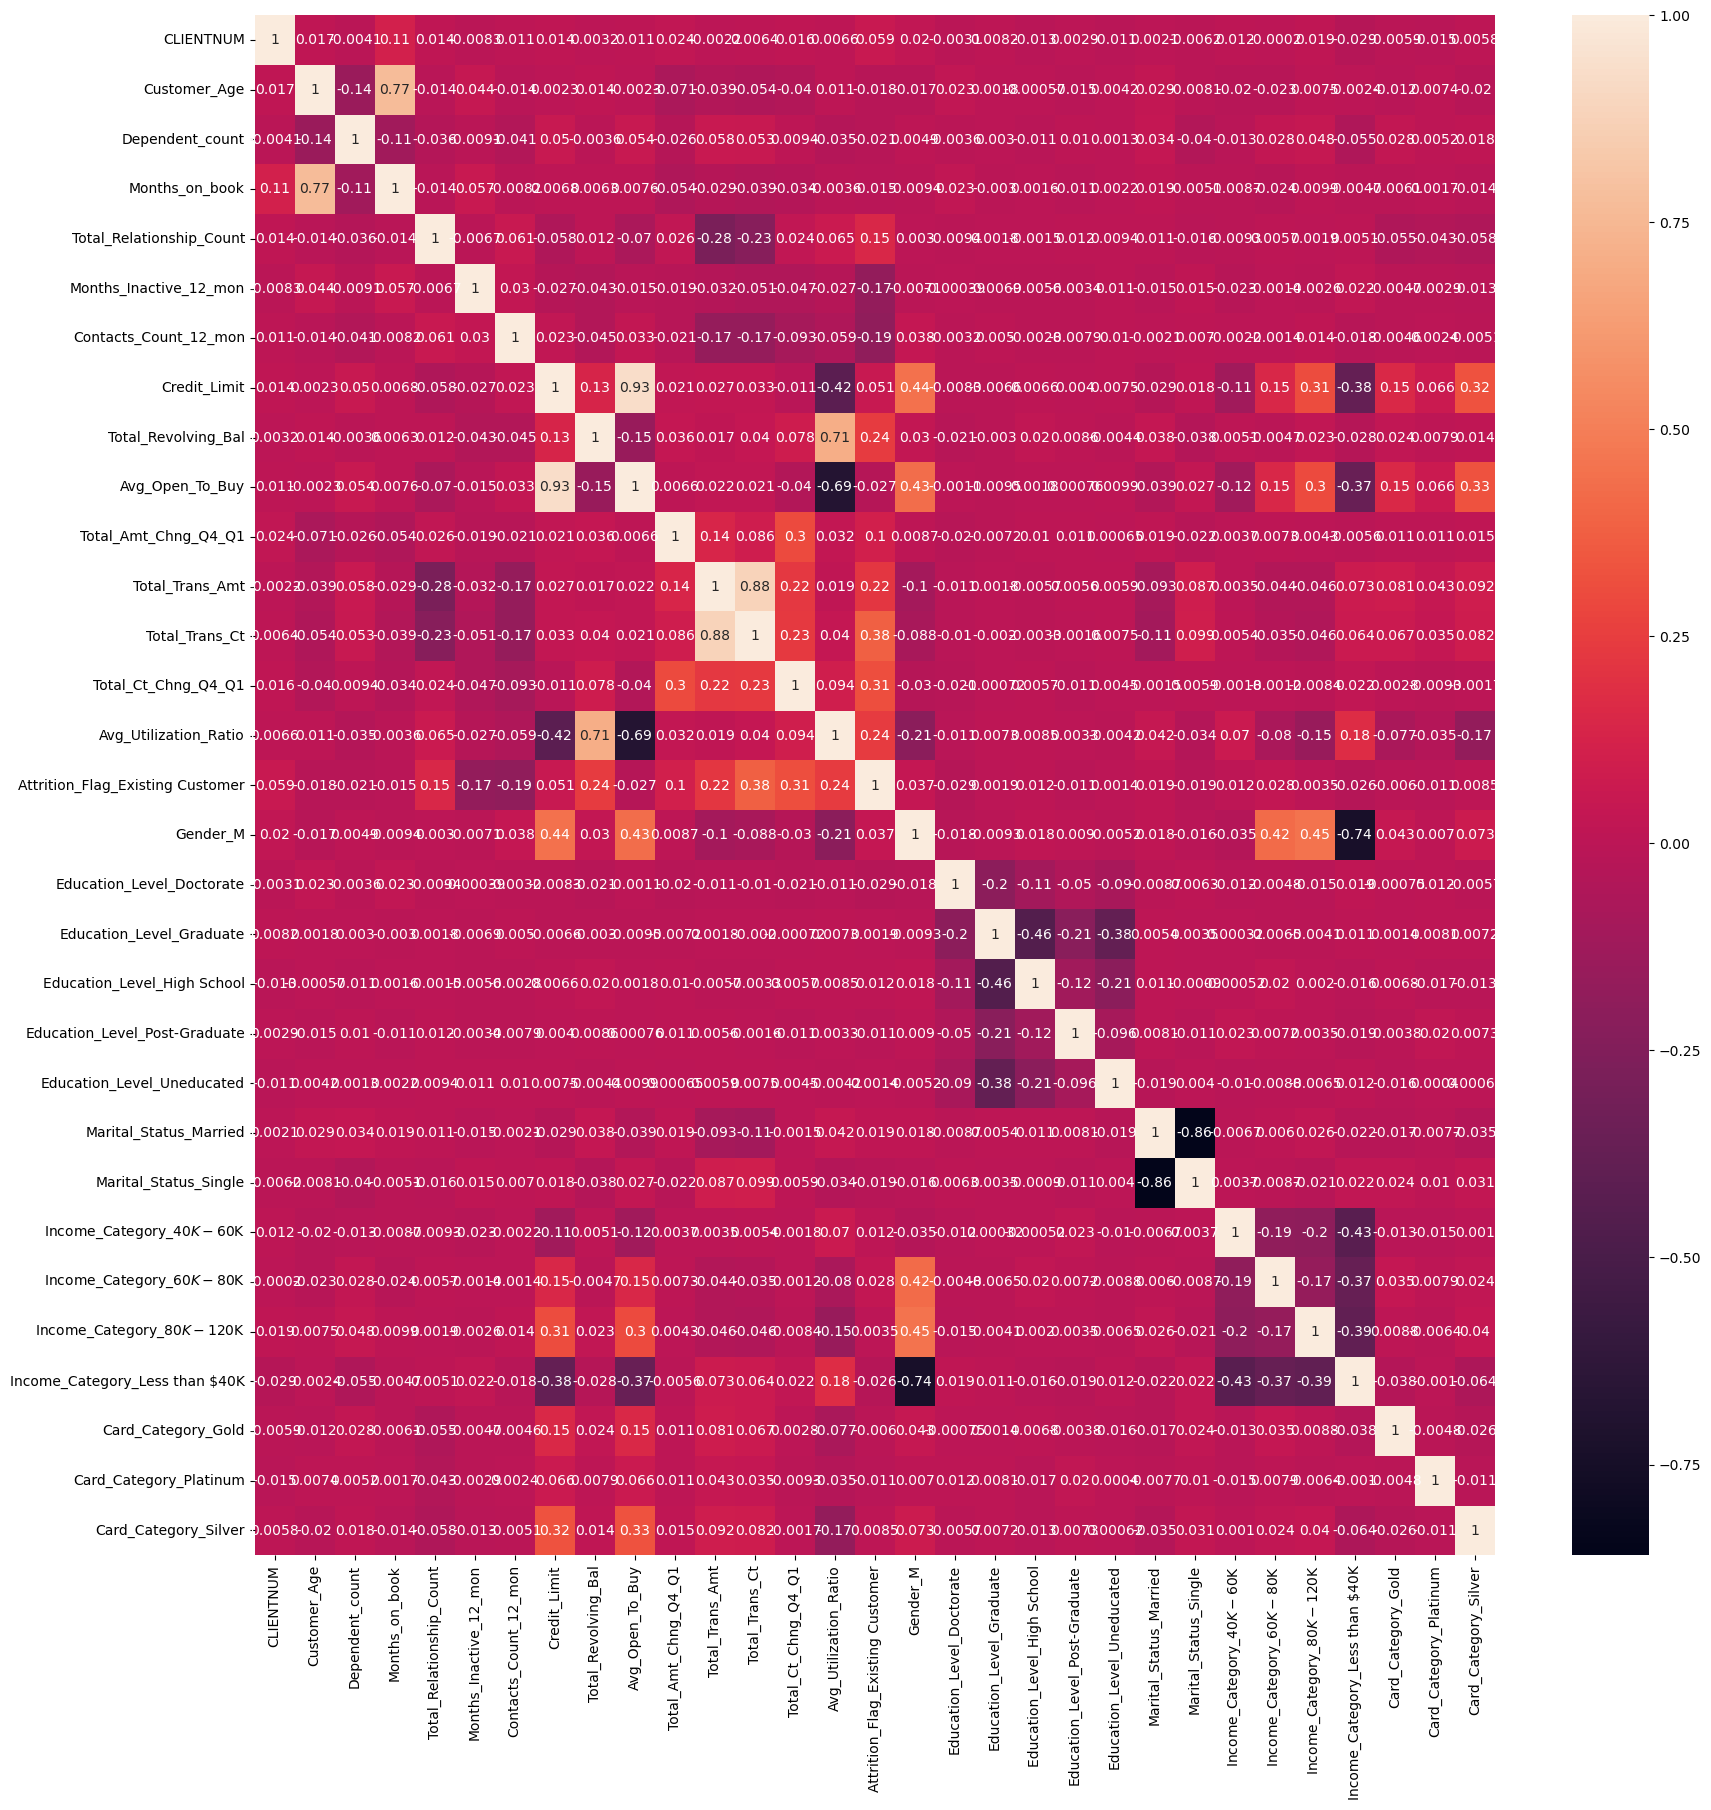

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)

In [31]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
CLIENTNUM,NaN,0.017488,-0.004093,0.110506,0.013798,-0.008302,0.011409,0.014320,0.003220,0.011137,0.023809,-0.002247,0.006442,0.016461,0.006647,0.059369,0.020265,-0.003093,0.008247,-0.012811,0.002863,-0.011274,0.002111,-0.006239,0.011935,-0.000201,0.018620,-0.029178,-0.005892,-0.015007,0.005799
Customer_Age,NaN,NaN,-0.143583,0.768884,-0.014495,0.044391,-0.014361,0.002326,0.013551,-0.002326,-0.070563,-0.038919,-0.053851,-0.040390,0.010562,-0.017508,-0.017462,0.023070,0.001766,-0.000574,-0.015361,0.004176,0.028576,-0.008117,-0.020236,-0.022843,0.007522,-0.002353,-0.012499,0.007403,-0.020392
Dependent_count,NaN,NaN,NaN,-0.114860,-0.035726,-0.009118,-0.041359,0.050350,-0.003574,0.054212,-0.026332,0.058091,0.052897,0.009435,-0.034930,-0.020983,0.004878,-0.003563,0.002958,-0.011438,0.010094,0.001342,0.033964,-0.040022,-0.013272,0.027814,0.048164,-0.054726,0.027844,0.005245,0.018150
Months_on_book,NaN,NaN,NaN,NaN,-0.014017,0.057406,-0.008212,0.006806,0.006307,0.007617,-0.054401,-0.028858,-0.038771,-0.033911,-0.003617,-0.015268,-0.009380,0.022899,-0.002982,0.001577,-0.011222,0.002212,0.019076,-0.005087,-0.008718,-0.023844,0.009883,-0.004706,-0.006106,0.001729,-0.014096
Total_Relationship_Count,NaN,NaN,NaN,NaN,NaN,-0.006674,0.061027,-0.058496,0.011651,-0.070172,0.025697,-0.280052,-0.226808,0.024278,0.065487,0.149674,0.002979,-0.009356,0.001847,-0.001461,0.012083,0.009414,0.011033,-0.016220,-0.009286,0.005700,0.001923,0.005061,-0.054682,-0.043123,-0.058461
Months_Inactive_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,0.030260,-0.027285,-0.042542,-0.015462,-0.018667,-0.031560,-0.050832,-0.046584,-0.026531,-0.171869,-0.007096,-0.000387,-0.006903,-0.005569,-0.003382,0.011004,-0.015212,0.015485,-0.022998,-0.001405,-0.002596,0.022234,-0.004695,-0.002877,-0.013289
Contacts_Count_12_mon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022768,-0.044691,0.032934,-0.020812,-0.167226,-0.168386,-0.093219,-0.058643,-0.188736,0.037927,-0.003219,0.004989,-0.002762,-0.007936,0.010011,-0.002102,0.006967,-0.002172,-0.001444,0.014279,-0.017697,-0.004571,0.002377,-0.005117
Credit_Limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131033,0.931383,0.020949,0.027297,0.033052,-0.011423,-0.416874,0.051212,0.441941,-0.008293,-0.006596,0.006640,0.004028,0.007465,-0.029163,0.017622,-0.114701,0.149874,0.307962,-0.376712,0.154316,0.065963,0.324987
Total_Revolving_Bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.151870,0.036120,0.016919,0.040185,0.078180,0.708607,0.240551,0.029733,-0.021291,-0.003001,0.020489,0.008636,-0.004396,0.037523,-0.037771,0.005057,-0.004650,0.022807,-0.028037,0.024415,0.007926,0.014319
Avg_Open_To_Buy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006630,0.021668,0.020986,-0.039914,-0.685238,-0.026640,0.429476,-0.001107,-0.009457,0.001836,0.000757,0.009927,-0.039232,0.026776,-0.116974,0.147941,0.299919,-0.365508,0.152721,0.066100,0.325027


<Axes: >

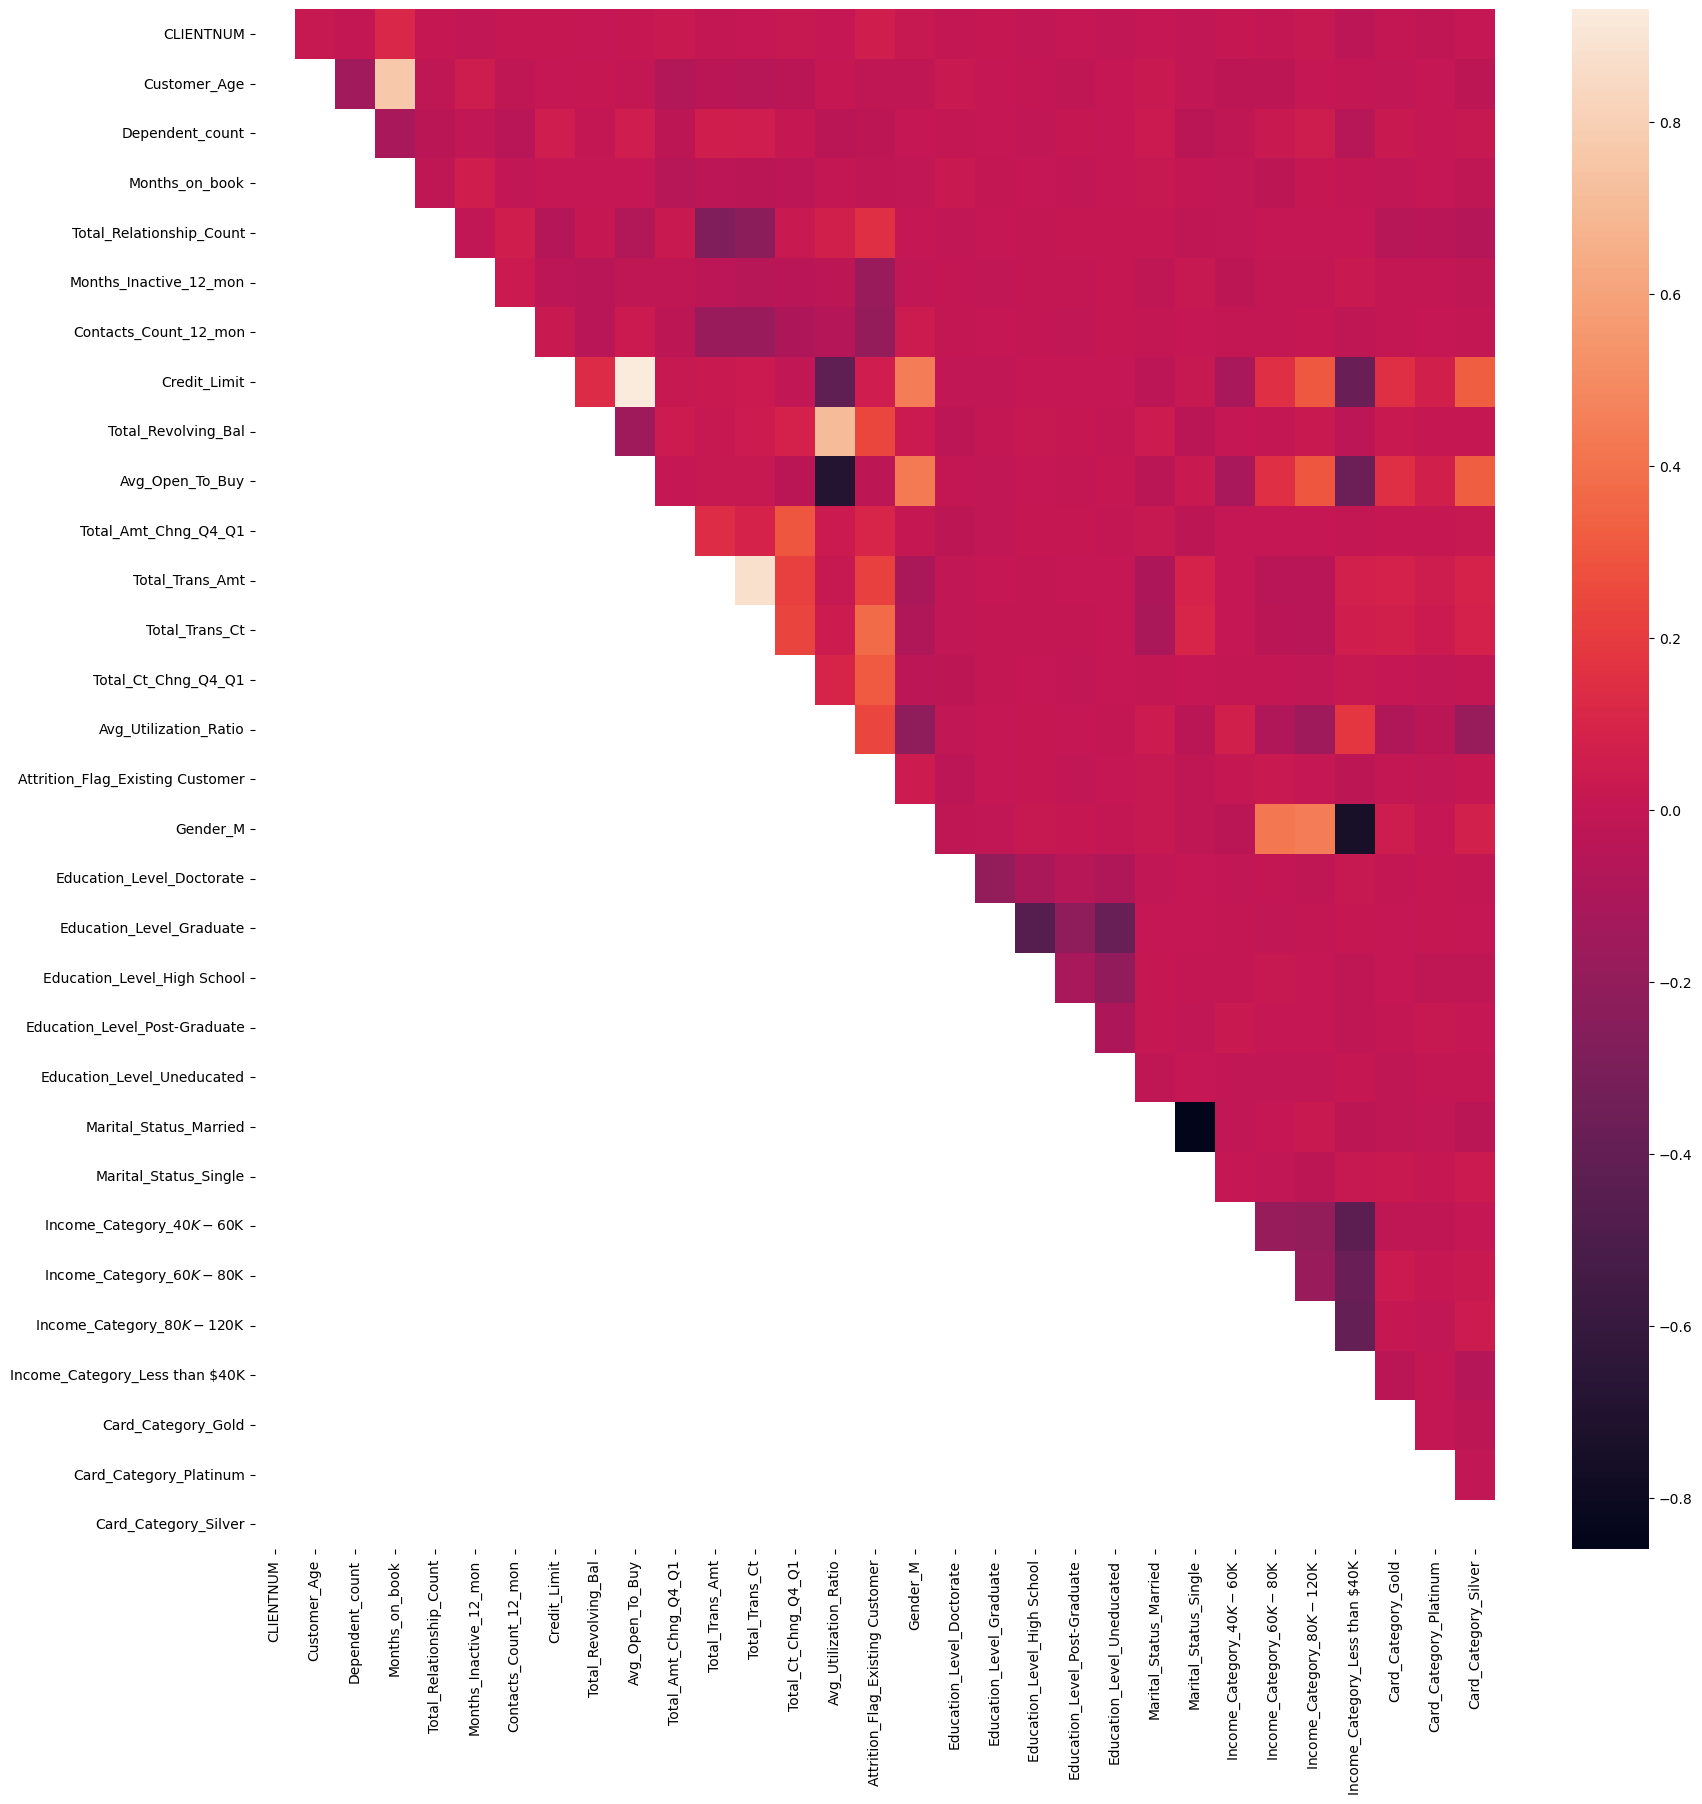

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(upper)

# Highly co-related columns

In [33]:
high_positive_corr=[column for column in upper.columns if any (upper[column]>=0.8)]
high_negative_corr=[column for column in upper.columns if any (upper[column]<=-0.8)]
print('high positive correlation\n',high_positive_corr)
print('high negative correlation\n',high_negative_corr)

high positive correlation
 ['Avg_Open_To_Buy', 'Total_Trans_Ct']
high negative correlation
 ['Marital_Status_Single']


In [34]:
all_drop=high_positive_corr+high_negative_corr
all_drop

['Avg_Open_To_Buy', 'Total_Trans_Ct', 'Marital_Status_Single']

In [35]:
df3.drop(all_drop,axis=1)
df3.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Existing Customer,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383.0,45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42.0,1.172,0.061,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,818770008.0,49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33.0,1.172,0.105,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,713982108.0,51.0,3.0,36.0,4.0,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20.0,1.172,0.000,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,769911858.0,40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.201,1171.0,20.0,1.172,0.760,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,709106358.0,40.0,3.0,21.0,5.0,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28.0,1.172,0.000,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CLIENTNUM                         10127 non-null  float64
 1   Customer_Age                      10127 non-null  float64
 2   Dependent_count                   10127 non-null  float64
 3   Months_on_book                    10127 non-null  float64
 4   Total_Relationship_Count          10127 non-null  float64
 5   Months_Inactive_12_mon            10127 non-null  float64
 6   Contacts_Count_12_mon             10127 non-null  float64
 7   Credit_Limit                      10127 non-null  float64
 8   Total_Revolving_Bal               10127 non-null  float64
 9   Avg_Open_To_Buy                   10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 11  Total_Trans_Amt                   10127 non-null  float64
 12  Tota

In [37]:
df3['Attrition_Flag_Existing Customer'].unique()

array([1, 0], dtype=uint8)

# splitting of data into indepented(X) and dependent(Y) variables

In [38]:
X=df3.drop('Attrition_Flag_Existing Customer',axis=1)
Y=df3['Attrition_Flag_Existing Customer']

In [39]:
df3['Attrition_Flag_Existing Customer'].unique()

array([1, 0], dtype=uint8)

In [40]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [41]:
X.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383.0,45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.201,1144.0,42.0,1.172,0.061,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,818770008.0,49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.201,1291.0,33.0,1.172,0.105,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,713982108.0,51.0,3.0,36.0,4.0,1.0,0.5,3418.0,0.0,3418.0,1.201,1887.0,20.0,1.172,0.000,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,769911858.0,40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.201,1171.0,20.0,1.172,0.760,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,709106358.0,40.0,3.0,21.0,5.0,1.0,0.5,4716.0,0.0,4716.0,1.201,816.0,28.0,1.172,0.000,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0


# Scaling of independent Variables data

In [42]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [43]:
scaler=MinMaxScaler()

In [44]:
X_scaled=scaler.fit_transform(X)

In [45]:
X_scaled

array([[0.50492928, 0.44705882, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.92039751, 0.54117647, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.04906017, 0.58823529, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07004765, 0.42352941, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.07753885, 0.09411765, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.05201312, 0.4       , 0.4       , ..., 0.        , 0.        ,
        1.        ]])

In [46]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.504929,0.447059,0.6,0.597222,0.8,0.125,0.625,0.502399,0.308701,0.525692,1.0,0.078182,0.256,1.0,0.061061,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.920398,0.541176,1.0,0.736111,1.0,0.125,0.375,0.304389,0.343266,0.326114,1.0,0.096310,0.184,1.0,0.105105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.049060,0.588235,0.6,0.513889,0.6,0.125,0.000,0.088388,0.000000,0.150721,1.0,0.169806,0.080,1.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.514130,0.329412,0.8,0.458333,0.4,0.875,0.125,0.083700,1.000000,0.034999,1.0,0.081512,0.080,1.0,0.760761,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.008517,0.329412,0.6,0.097222,0.8,0.125,0.000,0.146339,0.000000,0.208008,1.0,0.037735,0.144,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Splitting of data into Train and Test data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.20,random_state=100,stratify=Y)

In [49]:
X_train.shape

(8101, 30)

In [50]:
X_test.shape

(2026, 30)

# model building,Training and testing and model evaluation of dataset by Logistic Regression, Support Vector Matrix, GaussioanNB, KNN, DecisionTree, RandomForest, and BaggingClassifier

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score,roc_curve,recall_score

In [52]:
lr=LogisticRegression()
support=SVC()
gb=GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bg=BaggingClassifier()


In [53]:
for model in [lr,support,gb,knn,dt,rf,bg]:
    print('======'*6)
    print('Performance of model',model)
    abc=model.fit(X_train,Y_train)
    Y_predict_train=abc.predict(X_train)
    Y_predict_test=abc.predict(X_test)
    as_train=accuracy_score(Y_train,Y_predict_train)
    as_test=accuracy_score(Y_test,Y_predict_test)
    cm=confusion_matrix(Y_test,Y_predict_test)
    cr=classification_report(Y_test,Y_predict_test)
    rr=recall_score(Y_test,Y_predict_test)
    roc_auc=roc_auc_score(Y_test,Y_predict_test)
    
    print('Training accuracy score\n',as_train)
    print('======'*3)
    print('Test accuracy score\n', as_test)
    print('======'*3)
    print('confusion_matrix\n',cm)
    print('======'*3)
    print('classification report\n',cr)
    print('======'*3)
    print('Recall_Rate\n', rr)
    print('======'*3)
    print('ROC_AUC\n',roc_auc)
    print('======'*3)

Performance of model LogisticRegression()
Training accuracy score
 0.9105048759412419
Test accuracy score
 0.9155972359328727
confusion_matrix
 [[ 192  133]
 [  38 1663]]
classification report
               precision    recall  f1-score   support

           0       0.83      0.59      0.69       325
           1       0.93      0.98      0.95      1701

    accuracy                           0.92      2026
   macro avg       0.88      0.78      0.82      2026
weighted avg       0.91      0.92      0.91      2026

Recall_Rate
 0.9776601998824221
ROC_AUC
 0.7842147153258264
Performance of model SVC()
Training accuracy score
 0.9348228613751389
Test accuracy score
 0.9200394866732478
confusion_matrix
 [[ 193  132]
 [  30 1671]]
classification report
               precision    recall  f1-score   support

           0       0.87      0.59      0.70       325
           1       0.93      0.98      0.95      1701

    accuracy                           0.92      2026
   macro avg       0.9

 # Model Building by Regression tasks
 #  Model building and model evaluation by RandomForestRegression.
#  The RandomForestRegression model evaluation is not upto the mark as testing accuracy found to be within 75%
 # Training Accuracy: 0.9665502740757259
 # Testing Accuracy: 0.7566241960837516

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf1=RandomForestRegressor()

In [55]:
rf1.fit(X_train,Y_train)

RandomForestRegressor()

In [56]:
Y_train_predict=rf1.predict(X_train)
Y_test_predict=rf1.predict(X_test)


In [57]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [58]:
mse=mean_squared_error(Y_test,Y_test_predict)
mse

0.03257428430404738

In [59]:
rsme=np.sqrt(mse)
rsme

0.18048347376989224

In [60]:
mean_absolute_error(Y_test,Y_test_predict)

0.06856367226061205

In [61]:
r2_score(Y_test,Y_test_predict)

0.7581388631121965

In [62]:
train_accuracy = r2_score(Y_train, Y_train_predict)
test_accuracy = r2_score(Y_test, Y_test_predict)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9673465283477805
Testing Accuracy: 0.7581388631121965


In [63]:
# Model Building by Regression tasks
# Model building and model evaluation by LogisticRegression.
# The LogisticRegression model evaluation is found upto the mark as testing accuracy is 91% with Recall Rate of 97%
# Training Accuracy:  0.9105048759412419
# Testing Accuracy:  0.9155972359328727

In [64]:
lr2=LogisticRegression()

In [65]:
lr2.fit(X_train,Y_train)

LogisticRegression()

In [66]:
Y_test_predict1=lr2.predict(X_test)

In [67]:
Y_train_predict1=lr2.predict(X_train)

In [68]:
train_accuracy=accuracy_score(Y_train,Y_train_predict1)
print('Train_accuracy\n',train_accuracy)

Train_accuracy
 0.9105048759412419


In [69]:
test_accuracy=accuracy_score(Y_test,Y_test_predict1)
print('Test_accuracy\n',test_accuracy)

Test_accuracy
 0.9155972359328727


In [70]:
confusion_matrix(Y_test,Y_test_predict1)

array([[ 192,  133],
       [  38, 1663]])

In [71]:
print(classification_report(Y_test,Y_test_predict1))

              precision    recall  f1-score   support

           0       0.83      0.59      0.69       325
           1       0.93      0.98      0.95      1701

    accuracy                           0.92      2026
   macro avg       0.88      0.78      0.82      2026
weighted avg       0.91      0.92      0.91      2026



In [72]:
rr1=recall_score(Y_test,Y_test_predict1)
print('Logistic Regression -Recall Rate\n',rr1)

Logistic Regression -Recall Rate
 0.9776601998824221


# Probability score of attrited customers[0] and Existing customers[1] 

In [73]:
Y_test_probability=lr2.predict_proba(X_test)[:,1]
Y_test_probability

array([0.97220855, 0.92175542, 0.96211168, ..., 0.9966384 , 0.09405961,
       0.9870916 ])

In [74]:
probability_df = pd.DataFrame(Y_test_probability)
probability_df.head(100)


,0
0,0.972209
1,0.921755
2,0.962112
3,0.933801
4,0.766089
...,...
95,0.995004
96,0.967882
97,0.754064
98,0.884740


In [75]:
CLIENTNUM_df=df3["CLIENTNUM"]
CLIENTNUM_df

0        768805383.0
1        818770008.0
2        713982108.0
3        769911858.0
4        709106358.0
            ...     
10122    772366833.0
10123    710638233.0
10124    716506083.0
10125    717406983.0
10126    714337233.0
Name: CLIENTNUM, Length: 10127, dtype: float64

In [76]:


probability_df_with_clientnum = pd.concat([CLIENTNUM_df, probability_df], axis=1)

probability_df_with_clientnum.head(100)


,CLIENTNUM,0
0,768805383.0,0.972209
1,818770008.0,0.921755
2,713982108.0,0.962112
3,769911858.0,0.933801
4,709106358.0,0.766089
...,...,...
95,719712633.0,0.995004
96,772629333.0,0.967882
97,720336708.0,0.754064
98,802013583.0,0.884740


0.9384362139917697


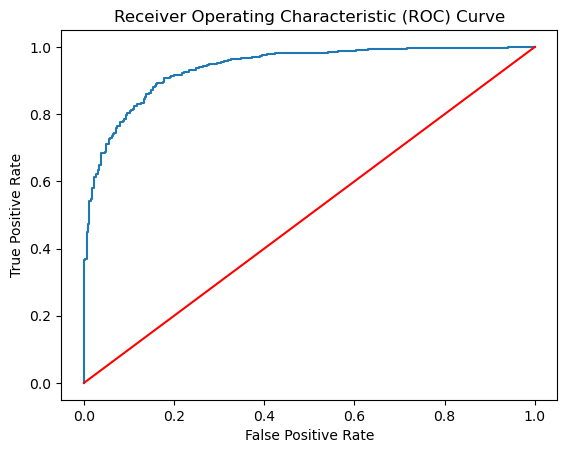

In [77]:
roc_auc=roc_auc_score(Y_test,Y_test_probability)
print(roc_auc)
fpr,tpr,threshold=roc_curve(Y_test,Y_test_probability)
plt.plot(fpr,tpr)
plt.plot([0,1],color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.show()


In [78]:
Y_test

911     1
3955    1
2580    1
1952    1
9504    1
       ..
2798    1
8447    1
9480    1
9949    0
9519    1
Name: Attrition_Flag_Existing Customer, Length: 2026, dtype: uint8

In [79]:
Y_test_predict1

array([1, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [80]:
X_test_new1=X_test.copy()

In [81]:
X_test_new1["Y_predicted"]=Y_test_predict1

In [82]:
X_test_new1["Actual_Y"]=Y_test

In [83]:
pd.set_option("display.max_rows",500)

In [84]:
X_test_new1.head(100)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Y_predicted,Actual_Y
911,0.603945,0.470588,0.6,0.486111,0.6,0.625,0.625,0.592139,0.649583,0.576536,0.360746,0.367482,0.472,0.323093,0.111111,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
3955,0.020674,0.494118,0.8,0.486111,0.6,0.375,0.625,0.231481,0.724275,0.211716,0.572368,0.219872,0.296,0.359110,0.275275,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
2580,0.006168,0.352941,0.6,0.291667,0.6,0.125,0.625,0.669914,0.541518,0.665424,0.437500,0.461448,0.432,0.483051,0.083083,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
1952,0.043285,0.658824,0.6,0.652778,0.8,0.875,0.875,0.076913,0.484704,0.085534,0.582237,0.234547,0.416,0.631356,0.386386,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
9504,0.521238,0.047059,0.2,0.000000,0.2,0.625,0.625,0.107586,0.000000,0.169699,0.605263,1.000000,0.760,0.493644,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
5516,0.073449,0.376471,0.4,0.513889,0.8,0.625,0.875,0.011506,0.000000,0.074721,0.413377,0.479329,0.480,0.423729,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
1992,0.056712,0.400000,0.0,0.513889,0.8,0.625,0.625,0.286977,0.000000,0.347034,0.502193,0.287696,0.344,0.635593,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
9270,0.055526,0.658824,0.2,0.513889,0.2,0.375,0.625,0.417882,0.547477,0.415619,0.375000,1.000000,0.760,0.616525,0.128128,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
4401,0.012354,0.329412,0.6,0.319444,0.6,0.125,0.375,0.046955,0.883989,0.011563,0.303728,0.348861,0.488,0.333686,0.894895,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1
4013,0.661357,0.752941,0.0,0.847222,1.0,0.375,0.875,0.053116,0.612634,0.047798,0.702851,0.471684,0.528,0.528602,0.587588,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1


In [85]:
df.iloc[9619]# attrition Flag is Attrited Customer

CLIENTNUM                           710980383
Attrition_Flag              Attrited Customer
Customer_Age                               53
Gender                                      M
Dependent_count                             3
Education_Level                   High School
Marital_Status                         Single
Income_Category                  $80K - $120K
Card_Category                          Silver
Months_on_book                             33
Total_Relationship_Count                    2
Months_Inactive_12_mon                      2
Contacts_Count_12_mon                       3
Credit_Limit                          34516.0
Total_Revolving_Bal                         0
Avg_Open_To_Buy                       34516.0
Total_Amt_Chng_Q4_Q1                    0.534
Total_Trans_Amt                          6361
Total_Trans_Ct                             74
Total_Ct_Chng_Q4_Q1                     1.114
Avg_Utilization_Ratio                     0.0
Name: 9619, dtype: object

In [86]:
X_test_new1.loc[9619] # Actual_Y=0, Y_predicted =1

CLIENTNUM                         0.024100
Customer_Age                      0.635294
Dependent_count                   0.600000
Months_on_book                    0.430556
Total_Relationship_Count          0.200000
Months_Inactive_12_mon            0.375000
Contacts_Count_12_mon             0.625000
Credit_Limit                      1.000000
Total_Revolving_Bal               0.000000
Avg_Open_To_Buy                   1.000000
Total_Amt_Chng_Q4_Q1              0.268640
Total_Trans_Amt                   0.721522
Total_Trans_Ct                    0.512000
Total_Ct_Chng_Q4_Q1               0.938559
Avg_Utilization_Ratio             0.000000
Gender_M                          1.000000
Education_Level_Doctorate         0.000000
Education_Level_Graduate          0.000000
Education_Level_High School       1.000000
Education_Level_Post-Graduate     0.000000
Education_Level_Uneducated        0.000000
Marital_Status_Married            0.000000
Marital_Status_Single             1.000000
Income_Cate

In [87]:
df.iloc[9619]# attrition Flag is Attrited Customer

CLIENTNUM                           710980383
Attrition_Flag              Attrited Customer
Customer_Age                               53
Gender                                      M
Dependent_count                             3
Education_Level                   High School
Marital_Status                         Single
Income_Category                  $80K - $120K
Card_Category                          Silver
Months_on_book                             33
Total_Relationship_Count                    2
Months_Inactive_12_mon                      2
Contacts_Count_12_mon                       3
Credit_Limit                          34516.0
Total_Revolving_Bal                         0
Avg_Open_To_Buy                       34516.0
Total_Amt_Chng_Q4_Q1                    0.534
Total_Trans_Amt                          6361
Total_Trans_Ct                             74
Total_Ct_Chng_Q4_Q1                     1.114
Avg_Utilization_Ratio                     0.0
Name: 9619, dtype: object

# The performance of several classification models on a BankChurners dataset. Here's a breakdown of the results for each model: Thde best model  # # # #evalauted is baggingClassifier having Testing accuracy = 95%, Recall Rate of 98% ROC AUC of 0.907¶



#Logistic Regression:
Training accuracy score: 0.911
Test accuracy score: 0.916
Confusion matrix: [[192, 133], [38, 1663]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.59      0.69       325
           1       0.93      0.98      0.95      1701

    accuracy                           0.92      2026
   macro avg       0.88      0.78      0.82      2026
weighted avg       0.91      0.92      0.91      2026
Recall_Rate
0.9776601998824221
ROC AUC: 0.784

#Support Vector Classifier (SVC):
Training accuracy score: 0.935
Test accuracy score: 0.920
Confusion matrix: [[193, 132], [30, 1671]]
Classification report: 
            precision    recall  f1-score   support

           0       0.87      0.59      0.70       325
           1       0.93      0.98      0.95      1701

    accuracy                           0.92      2026
   macro avg       0.90      0.79      0.83      2026
weighted avg       0.92      0.92      0.91      2026

Recall_Rate
 0.982363315696649
ROC AUC: 0.788

#Gaussian Naive Bayes:
Training accuracy score: 0.888
Test accuracy score: 0.885
Confusion matrix: [[182, 143], [89, 1612]]
Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.56      0.61       325
           1       0.92      0.95      0.93      1701

    accuracy                           0.89      2026
   macro avg       0.80      0.75      0.77      2026
weighted avg       0.88      0.89      0.88      2026

Recall_Rate
0.9476778365667254
    
ROC AUC: 0.754

#K-Nearest Neighbors (KNN):
Training accuracy score: 0.907
Test accuracy score: 0.874
Confusion matrix: [[101, 224], [31, 1670]]
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.31      0.44       325
           1       0.88      0.98      0.93      1701

    accuracy                           0.87      2026
   macro avg       0.82      0.65      0.69      2026
weighted avg       0.86      0.87      0.85      2026

Recall_Rate
0.9817754262198707
ROC AUC: 0.646

#Decision Tree Classifier:
Training accuracy score: 1.000
Test accuracy score: 0.941
Confusion matrix: [[265, 60], [59, 1642]]
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       325
           1       0.96      0.97      0.97      1701

    accuracy                           0.94      2026
   macro avg       0.89      0.89      0.89      2026
weighted avg       0.94      0.94      0.94      2026

Recall_Rate
0.9629629629629629

ROC AUC: 0.890

#Random Forest Classifier:
Training accuracy score: 1.000
Test accuracy score: 0.955
Confusion matrix: [[259, 66], [26, 1675]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85       325
           1       0.96      0.98      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.94      0.89      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Recall_Rate
0.9835390946502057
    
ROC AUC: 0.891

#Bagging Classifier:
Training accuracy score: 0.998
Test accuracy score: 0.949
Confusion matrix: [[275, 50], [53, 1648]]
Classification report: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       325
           1       0.97      0.97      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.90      0.91      0.91      2026
weighted avg       0.95      0.95      0.95      2026

Recall_Rate
0.9735449735449735

ROC AUC: 0.907